In [2]:
import numpy as np
import matplotlib.pyplot  as plt
import math 

In [3]:
x = np.genfromtxt('trajectory_file')#, dtype= None, delimiter= None)
# print(type(x))

In [4]:
# calculando histograma

def hist_dx(x, dx, dt=1):
    hist, bin_edges = np.histogram(x, bins=np.arange(min(x), max(x) + dx, dx)) # 'bins' são os valores e 'hist' é quantidade de vezes que eles aparecem
    dist_den = hist / (dt * dx) # normalização do histograma onde o valor em cada bin representa uma densidade e não uma contagem
    bins = bin_edges[:-1]
    hist_dx = dict(zip(bins, dist_den)) # transformar em lista 
    
    return hist_dx

In [8]:
def hist_tpx(x, x0, x1, dx):

    hist_zh = hist_dx(x, dx)
    states = {} # states recebe os valores dentro do intervalo e seu respectivo estado 
    tpx = [] # valores dentro dos intervalos escolhidos 
    
    s = 2 # estado incial 

    if x0 > x1:
        x0, x1 = x1, x0

    def state(states, tpx):
        hist, bin_edges = np.histogram(tpx, bins=np.arange(min(tpx), max(tpx) + dx, dx))
#         print(hist, bin_edges)
        for bin_val, count in zip(bin_edges[:-1], hist):
#         print(bin_val, count)
            states[bin_val] = states.get(bin_val, 0) + count
        
    for val in x:
        tpx.append(val)

        if s == 2:
            if val <= x0:
                s = 0
            elif val >= x1:
                s = 1

        if val <= x0:
            if s == 1:
                state(states, tpx)
            s = 0
            tpx = []

        elif val >= x1:
            if s == 0:
                state(states, tpx)
            s = 1
            tpx = []
    ptpx = []
    for val in hist_zh:
        transition_prob = float(states.get(val, 0)) / (dx * hist_zh[val]) if hist_zh[val] > 0 else 0
        ptpx.append((val, transition_prob))

    ptpx.sort()
    return ptpx

# Load data from file
x = np.genfromtxt('trajectory_file')

# Parameters
x0 = 30
x1 = 37
dx = 0.5  # Ideal range: 0.1 to 0.5

# Compute results
ptpx_result = hist_tpx(x, x0, x1, dx)
# hist_result = compZh_np(x, dx, dt=1)

# Example output
# print("Histogram (zheq):", zheq_result)
# print("Transition probabilities (ptpx):", ptpx_result)
# print(hist_result)

[1 0 0 0 0 0 0 0 0 0 1 0 1 0 1] [29.61 30.11 30.61 31.11 31.61 32.11 32.61 33.11 33.61 34.11 34.61 35.11
 35.61 36.11 36.61 37.11]
[1 0 0 0 2 0 0 0 1 1 0 0 0 1] [31.96 32.46 32.96 33.46 33.96 34.46 34.96 35.46 35.96 36.46 36.96 37.46
 37.96 38.46 38.96]
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1] [28.94 29.44 29.94 30.44 30.94 31.44 31.94 32.44 32.94 33.44 33.94 34.44
 34.94 35.44 35.94 36.44]
[1 1 0 1 0 0 1 3 0 1] [32.29 32.79 33.29 33.79 34.29 34.79 35.29 35.79 36.29 36.79 37.29]
[1 0 1 0 0 0 0 0 1] [29.1 29.6 30.1 30.6 31.1 31.6 32.1 32.6 33.1 33.6]
[1 0 1 0 1 0 0 1 0 0 0 0 0 1] [31.53 32.03 32.53 33.03 33.53 34.03 34.53 35.03 35.53 36.03 36.53 37.03
 37.53 38.03 38.53]
[1 0 0 0 0 0 1 0 0 0 0 0 1 1] [28.87 29.37 29.87 30.37 30.87 31.37 31.87 32.37 32.87 33.37 33.87 34.37
 34.87 35.37 35.87]
[1 0 1 3 0 0 0 0 1 0 0 0 0 0 1] [32.23 32.73 33.23 33.73 34.23 34.73 35.23 35.73 36.23 36.73 37.23 37.73
 38.23 38.73 39.23 39.73]
[1 0 0 0 0 1 0 1] [28.19 28.69 29.19 29.69 30.19 30.69 31.19 31.69 32.19]
[1

[1 0 1 0 0 1 0 0 1 0 0 1 0 1] [30.72 31.22 31.72 32.22 32.72 33.22 33.72 34.22 34.72 35.22 35.72 36.22
 36.72 37.22 37.72]
[1 0 0 0 0 1 0 1 0 1 0 0 0 1 1] [28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5 35.
 35.5 36. ]
[1 0 0 1 0 0 1 0 0 0 1] [31.73 32.23 32.73 33.23 33.73 34.23 34.73 35.23 35.73 36.23 36.73 37.23]
[1 0 0 0 0 0 0 0 0 2 2 1 0 0 2 0 0 1] [25.38 25.88 26.38 26.88 27.38 27.88 28.38 28.88 29.38 29.88 30.38 30.88
 31.38 31.88 32.38 32.88 33.38 33.88 34.38]
[1 0 0 1 0 0 0 2 1 0 0 0 0 0 0 1] [32.32 32.82 33.32 33.82 34.32 34.82 35.32 35.82 36.32 36.82 37.32 37.82
 38.32 38.82 39.32 39.82 40.32]
[1 0 0 0 0 0 0 0 0 1 0 0 1] [29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5 35.  35.5]
[1 0 0 1 1 0 0 0 0 0 1] [32.14 32.64 33.14 33.64 34.14 34.64 35.14 35.64 36.14 36.64 37.14 37.64]
[1 0 0 0 0 1 0 0 0 1] [29.64 30.14 30.64 31.14 31.64 32.14 32.64 33.14 33.64 34.14 34.64]
[1 0 0 0 1] [34.84 35.34 35.84 36.34 36.84 37.34]
[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]

[1 0 0 0 0 0 0 1 0 1 0 0 1 1 3 0 1 0 0 0 1] [26.36 26.86 27.36 27.86 28.36 28.86 29.36 29.86 30.36 30.86 31.36 31.86
 32.36 32.86 33.36 33.86 34.36 34.86 35.36 35.86 36.36 36.86]
[1 0 0 0 1 0 0 0 1] [32.7 33.2 33.7 34.2 34.7 35.2 35.7 36.2 36.7 37.2]
[1 0 0 0 1 0 1 1 0 1] [29.92 30.42 30.92 31.42 31.92 32.42 32.92 33.42 33.92 34.42 34.92]
[1 0 0 0 1 0 0 0 0 0 1] [33.99 34.49 34.99 35.49 35.99 36.49 36.99 37.49 37.99 38.49 38.99 39.49]
[1 0 0 0 0 0 0 1 0 0 0 0 0 0 1] [28.62 29.12 29.62 30.12 30.62 31.12 31.62 32.12 32.62 33.12 33.62 34.12
 34.62 35.12 35.62 36.12]
[2 0 1 0 0 0 1 1 0 0 1] [32.48 32.98 33.48 33.98 34.48 34.98 35.48 35.98 36.48 36.98 37.48 37.98]
[1 0 0 1 0 1 0 1 0 1 0 2 1] [28.93 29.43 29.93 30.43 30.93 31.43 31.93 32.43 32.93 33.43 33.93 34.43
 34.93 35.43]
[3 0 1 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 1] [30.59 31.09 31.59 32.09 32.59 33.09 33.59 34.09 34.59 35.09 35.59 36.09
 36.59 37.09 37.59 38.09 38.59 39.09 39.59 40.09 40.59]
[1 0 0 0 1 0 0 0 1] [29.15 29.65 30.15 30.65 3

[1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1] [30.21 30.71 31.21 31.71 32.21 32.71 33.21 33.71 34.21 34.71 35.21 35.71
 36.21 36.71 37.21 37.71 38.21 38.71]
[1 0 0 0 0 1 0 1 0 0 0 0 0 1 2] [29.06 29.56 30.06 30.56 31.06 31.56 32.06 32.56 33.06 33.56 34.06 34.56
 35.06 35.56 36.06 36.56]
[1 0 0 0 0 0 0 1 0 0 0 0 1] [32.74 33.24 33.74 34.24 34.74 35.24 35.74 36.24 36.74 37.24 37.74 38.24
 38.74 39.24]
[1 0 0 0 1 0 0 0 0 1 0 0 1] [29.22 29.72 30.22 30.72 31.22 31.72 32.22 32.72 33.22 33.72 34.22 34.72
 35.22 35.72]
[1 1 0 0 0 0 0 0 0 0 0 0 1] [30.89 31.39 31.89 32.39 32.89 33.39 33.89 34.39 34.89 35.39 35.89 36.39
 36.89 37.39]
[1 0 0 0 0 0 1 0 0 0 0 0 0 1] [29.93 30.43 30.93 31.43 31.93 32.43 32.93 33.43 33.93 34.43 34.93 35.43
 35.93 36.43 36.93]
[1 0 0 0 0 1 0 0 0 0 0 0 0 0 1] [30.52 31.02 31.52 32.02 32.52 33.02 33.52 34.02 34.52 35.02 35.52 36.02
 36.52 37.02 37.52 38.02]
[1 0 0 1 0 0 0 0 1 0 1 1 1 4 1] [28.36 28.86 29.36 29.86 30.36 30.86 31.36 31.86 32.36 32.86 33.36 33.86
 34.36 34.86 35.36

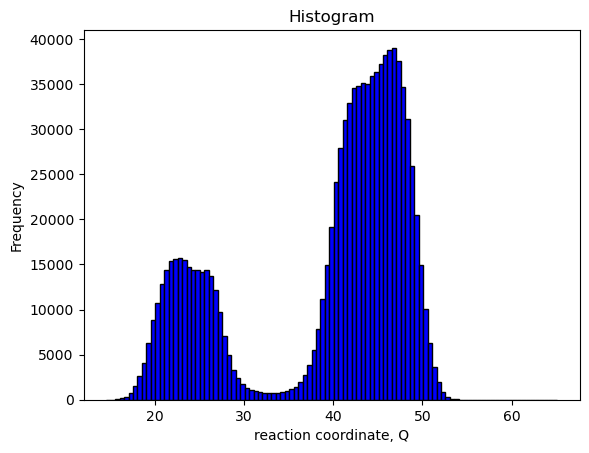

In [6]:
plt.hist(x, bins=np.arange(min(x), max(x) + dx, dx), color='blue', edgecolor='black')
plt.xlabel('reaction coordinate, Q')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

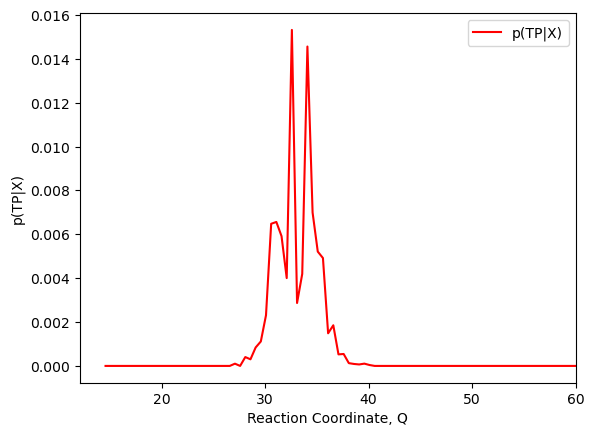

In [7]:
x, y = zip(*ptpx_result) 
fig, ax = plt.subplots()
ax.plot(x, y, color='red', label = 'p(TP|X)')
plt.xlabel('Reaction Coordinate, Q')
plt.ylabel('p(TP|X)')
plt.xlim([None, 60])
plt.ylim([None, None])
plt.legend()
plt.show()

In [7]:
# # Calcula o p(TP|X)

# import numpy as np

# def ptpx(x, x0, x1):
    
#     ptpx = []
#     Q = []
    
#     # Garante que x0 seja menor que x1
#     if x0 > x1:
#         x0, x1 = x1, x0
        
#     for i in x:
#         if x0 <= i <= x1:
#             Q.append(x)
            
#     return ptpx

# # teste da função
# x0 = 30
# x1 = 37
# # dx = 0.5

# result = ptpx(x, x0, x1)
# print(result)

# # np.savetxt('TPX.txt', result, fmt='%5.4f')

# # return np.round(x, 1)

MemoryError: Unable to allocate 119. GiB for an array with shape (15924, 1000000) and data type float64